# WeatherPy
----


In [1]:
%matplotlib notebook

In [33]:
# Dependencies and Setup, including import os for path to write to csv
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import stats
from scipy.stats import linregress


# Import API key for OpenWeatherMap
from config import weather_api_key

# Incorporate citipy to determine city from latitude and longitude
from citipy import citipy

In [3]:
# Output File (CSV)
output_file = os.path.join("..", "output_data", "cities.csv")

# Range of latitudes and longitudes (all possible for use with np.random)
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations to use to find nearest city with citipy
lats = np.random.uniform(lat_range[0], lat_range[1], size=1400)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1400)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count (> 500 cities)
print(len(cities))

592


In [5]:
# View the lengthy list of cities created from the random coordinates
cities

['umm lajj',
 'vardo',
 'illoqqortoormiut',
 'suzun',
 'taolanaro',
 'mar del plata',
 'sioux lookout',
 'tsihombe',
 'san patricio',
 'pervomayskiy',
 'esperance',
 'avarua',
 'bambous virieux',
 'jamestown',
 'rikitea',
 'connersville',
 'seoul',
 'chokurdakh',
 'port elizabeth',
 'bluff',
 'albany',
 'katsuura',
 'galveston',
 'severo-kurilsk',
 'troitskoye',
 'pochutla',
 'dikson',
 'gubkinskiy',
 'busselton',
 'tromso',
 'yaring',
 'hermanus',
 'paamiut',
 'aguililla',
 'hobart',
 'barrow',
 'cape town',
 'tiarei',
 'dingle',
 'hilo',
 'axim',
 'bur gabo',
 'marondera',
 'punta arenas',
 'khatanga',
 'qaanaaq',
 'longyearbyen',
 'mount isa',
 'bredasdorp',
 'praya',
 'indiaroba',
 'nadym',
 'grand river south east',
 'lebu',
 'adrar',
 'tual',
 'arraial do cabo',
 'vadso',
 'tasiilaq',
 'kiruna',
 'kaitangata',
 'puerto ayora',
 'ushuaia',
 'talcahuano',
 'novobirilyussy',
 'bethanien',
 'carnarvon',
 'broome',
 'laguna',
 'los llanos de aridane',
 'mataura',
 'atuona',
 'kapaa',


## Perform API Calls
* Perform a weather check on the cities list (using a series of API calls) and include a print log to record each city as it's processed with city number and name  

Starter code had print of how the list should look, with groups of about 50  
Desired result is from a try, then except message "City not found. Skipping..." pass  
Goal data frame City Lat Lng MaxTemp Humidity Cloudiness Wind Speed Country Date

In [6]:
# Starter code had print of how the list should look, with groups of about 50
# Desired result is from a try, then except message "City not found. Skipping..." pass

# Save config information for API calls
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL, and choose imperial for Fahrenheit
query_url = f'{base_url}appid={weather_api_key}&units=imperial&q='

In [7]:
# Request/receive data using API and put in a dictionary to use for a data frame

# Identify start point for the data retrieval
print('Beginning Data Retrieval Process\n\
--------------\n')

# Create a list to store weather info to be requested with the API
weather_details = []

# Identify the variables in a way to divide into smaller sets, and set starting values
record = 0
sets = 1

# Create a for loop to add details about current weather 
for city in cities:
    record += 1
    print(f'Processing Record {record} of Set {sets} | {city}')
    
    # Once a set reaches 50 cities, move to the next set
    if record == 50:
        record = 0
        sets += 1
        
# Within the for loop request info needed from OpenWeatherMap
    response = requests.get(query_url + city).json()
    
    # Include a route out if the city requested is not found
    try:
        # Goal data frame includes City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date
        weather_details.append({
            'City': city,
            'Lat': response['coord']['lat'],
            'Lng': response['coord']['lon'],
            'Max Temp': response['main']['temp_max'],
            'Humidity': response['main']['humidity'],
            'Cloudiness': response['clouds']['all'],
            'Wind Speed': response['wind']['speed'],
            'Country': response['sys']['country'],
            'Date': response['dt']
        })
    except:
        # Identify text to include if the city is not found, and pass to continue the looping
        print('City not found. Skipping...')
        pass

# Add text to show data retrieval has concluded
print(f'--------------\n\
Data Retrieval Complete\n\
--------------')

Beginning Data Retrieval Process
--------------

Processing Record 1 of Set 1 | umm lajj
Processing Record 2 of Set 1 | vardo
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | suzun
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | sioux lookout
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | san patricio
Processing Record 10 of Set 1 | pervomayskiy
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | connersville
Processing Record 17 of Set 1 | seoul
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | bluff
Processing Record 21 of

Processing Record 40 of Set 4 | ilulissat
Processing Record 41 of Set 4 | bamboo
Processing Record 42 of Set 4 | inta
Processing Record 43 of Set 4 | bad krozingen
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | figeac
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | atlantic city
Processing Record 48 of Set 4 | conakry
Processing Record 49 of Set 4 | nikolskoye
Processing Record 50 of Set 4 | kodiak
Processing Record 1 of Set 5 | fairbanks
Processing Record 2 of Set 5 | puerto del rosario
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | alice springs
Processing Record 5 of Set 5 | bambanglipuro
Processing Record 6 of Set 5 | flinders
Processing Record 7 of Set 5 | belmonte
Processing Record 8 of Set 5 | illela
Processing Record 9 of Set 5 | burica
City not found. Skipping...
Processing Record 10 of Set 5 | roma
Processing Record 11 of Set 5 | xichang
Processing Record 12 of Set 5 | daru
Processing Record 13 of Set 5 | po

Processing Record 29 of Set 8 | muros
Processing Record 30 of Set 8 | zemio
Processing Record 31 of Set 8 | cidreira
Processing Record 32 of Set 8 | ponta delgada
Processing Record 33 of Set 8 | akdepe
Processing Record 34 of Set 8 | pacific grove
Processing Record 35 of Set 8 | opotiki
Processing Record 36 of Set 8 | gwadar
Processing Record 37 of Set 8 | bolpur
Processing Record 38 of Set 8 | viligili
City not found. Skipping...
Processing Record 39 of Set 8 | nalut
Processing Record 40 of Set 8 | inirida
Processing Record 41 of Set 8 | port lincoln
Processing Record 42 of Set 8 | chapais
Processing Record 43 of Set 8 | naze
Processing Record 44 of Set 8 | grand-santi
Processing Record 45 of Set 8 | zaysan
Processing Record 46 of Set 8 | seredka
Processing Record 47 of Set 8 | sabalgarh
Processing Record 48 of Set 8 | ninh binh
Processing Record 49 of Set 8 | kahului
Processing Record 50 of Set 8 | vestmannaeyjar
Processing Record 1 of Set 9 | tarakan
Processing Record 2 of Set 9 | p

Processing Record 15 of Set 12 | rio gallegos
Processing Record 16 of Set 12 | tunduru
City not found. Skipping...
Processing Record 17 of Set 12 | sao francisco
Processing Record 18 of Set 12 | ocampo
Processing Record 19 of Set 12 | boyabat
Processing Record 20 of Set 12 | cheney
Processing Record 21 of Set 12 | nim ka thana
City not found. Skipping...
Processing Record 22 of Set 12 | vila velha
Processing Record 23 of Set 12 | graciano sanchez
Processing Record 24 of Set 12 | chistogorskiy
Processing Record 25 of Set 12 | mayo
Processing Record 26 of Set 12 | tilichiki
Processing Record 27 of Set 12 | broken hill
Processing Record 28 of Set 12 | kaeo
Processing Record 29 of Set 12 | komsomolskiy
Processing Record 30 of Set 12 | hambantota
Processing Record 31 of Set 12 | ostrovnoy
Processing Record 32 of Set 12 | cockburn town
Processing Record 33 of Set 12 | nguiu
City not found. Skipping...
Processing Record 34 of Set 12 | tingo maria
Processing Record 35 of Set 12 | killybegs
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a Pandas DataFrame for the information collected
weather_df = pd.DataFrame(weather_details)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,umm lajj,25.0213,37.2685,78.22,73,0,5.77,SA,1619305551
1,vardo,70.3705,31.1107,34.88,76,100,22.15,NO,1619305389
2,suzun,53.7841,82.3116,32.52,82,15,3.38,RU,1619305551
3,mar del plata,-38.0023,-57.5575,59.00,72,40,6.91,AR,1619305538
4,sioux lookout,50.1001,-91.9170,39.20,28,40,11.50,CA,1619305552
...,...,...,...,...,...,...,...,...,...
538,general pico,-35.6566,-63.7568,55.78,66,1,7.54,AR,1619305699
539,berlevag,70.8578,29.0864,33.89,69,99,13.71,NO,1619305713
540,high rock,26.6208,-78.2833,80.60,74,75,12.66,BS,1619305714
541,clyde river,70.4692,-68.5914,17.60,100,75,10.36,CA,1619305714


In [9]:
# Export weather to a csv file: output_file = os.path.join("..", "output_data", "cities.csv")
weather_df.to_csv(output_file, header=True) 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Check out the weather statistics (and check if max humidity > 100)
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,20.842492,16.119402,59.846888,69.298343,54.049724,7.974788,1.619306e+09
std,33.661790,90.722897,18.511628,22.547926,38.194049,5.336419,9.535911e+01
min,-54.800000,-179.166700,1.980000,6.000000,0.000000,0.380000,1.619305e+09
25%,-7.244550,-65.407400,43.760000,57.000000,16.500000,4.035000,1.619306e+09
50%,26.124700,21.286900,61.140000,76.000000,66.000000,6.910000,1.619306e+09
75%,49.200000,92.195950,77.000000,86.000000,91.000000,10.360000,1.619306e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,28.770000,1.619306e+09


In [11]:
# Above looks like no humidity is > 100 but will locate any >= to 100 to take a look
locations_high_humidity = weather_df.loc[weather_df['Humidity'] >= 100]
locations_high_humidity

# Confirmed understanding of .describe() humidity column max, no humidity>100 errors exist in data
# weather_df is clean data for use in plotting

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
15,port elizabeth,-33.9180,25.5701,53.6,100,75,3.44,ZA,1619305555
113,mount gambier,-37.8333,140.7667,51.8,100,90,4.61,AU,1619305583
307,topolevo,48.4994,135.1975,33.8,100,20,13.42,RU,1619305642
444,petropavlovsk-kamchatskiy,53.0452,158.6483,35.6,100,90,6.71,RU,1619305520
502,santa maria,-29.6842,-53.8069,64.4,100,90,1.14,BR,1619305416
541,clyde river,70.4692,-68.5914,17.6,100,75,10.36,CA,1619305714


In [12]:
# Use time to convert datetime column to mm-dd-yyyy only for a new column / did not complete

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [13]:
# define a function that will allow simpler plotting
def show_plot(x_col, y_col):
    x_values = weather_df.iloc[:,x_col]
    y_values = weather_df.iloc[:,y_col]
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge)
    
    plt.title(plot_title)
    plt.xlabel(x_label_name)
    plt.ylabel(y_label_name)
    plt.grid()
    plt.show()

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


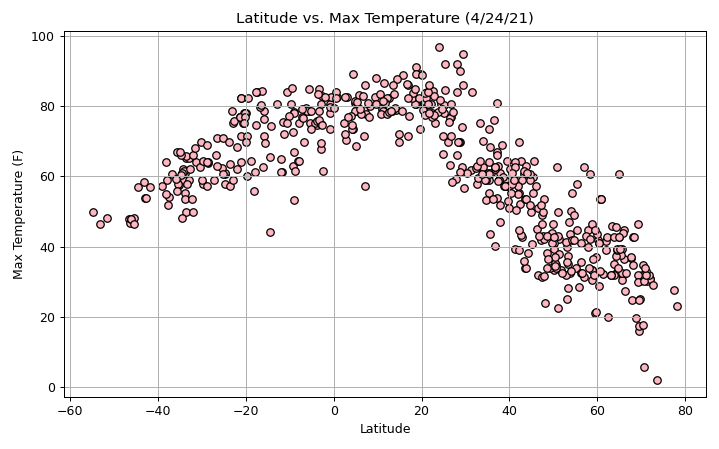

In [14]:
# Plot latitude vs max_temp
figure1 = plt.figure(figsize=(8,5))
plot_title = 'Latitude vs. Max Temperature (4/24/21)'
x_label_name = 'Latitude'
y_label_name = 'Max Temperature (F)'
face = 'lightpink'
edge= 'black'

fig1 = show_plot(1, 3)
plt.tight_layout()

In [15]:
# Save the plot to png file in same place as cities.csv
# Like output_file = os.path.join("..", "output_data", "cities.csv")
latitude_vs_max_temp_image_path = os.path.join('..', 'output_data', 'LatitudeVsMaxTemp.png')
plt.savefig(latitude_vs_max_temp_image_path)

plt.show()

### From instructions, after each plot add brief explanation of what the code is analyzing
* The figure above is plotting the latitude and max temp for each city. The curve seen in the results is expected, since the 0 for the x-axis is the equator and temps would be expected to be the warmest nearer to the equator. The plotting to the left and right sides of the figure are for the latitudes nearer to the poles and so the temperatures are lower than near the equator. 

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


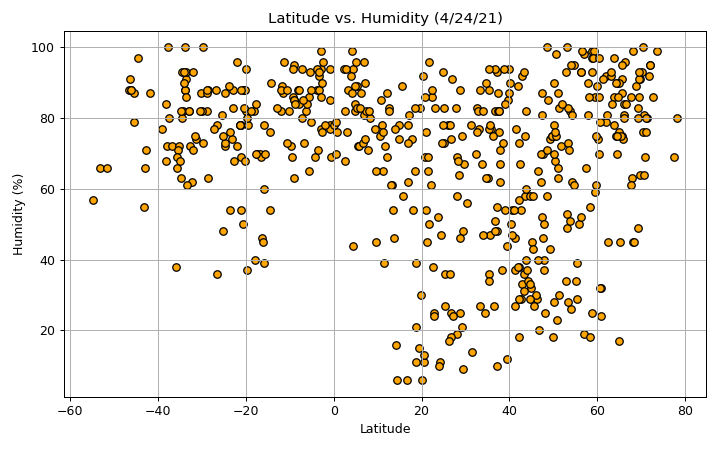

In [16]:
# Plot latitude vs humidity
figure2 = plt.figure(figsize=(8,5))
plot_title = 'Latitude vs. Humidity (4/24/21)'
x_label_name = 'Latitude'
y_label_name = 'Humidity (%)'
face = 'orange'
edge= 'black'

fig2 = show_plot(1, 4)
plt.tight_layout()

In [17]:
# Save the plot to png file in same place as cities.csv
# Like output_file = os.path.join("..", "output_data", "cities.csv")
latitude_vs_humidity_image_path = os.path.join('..', 'output_data', 'LatitudeVsHumidity.png')
plt.savefig(latitude_vs_humidity_image_path)

plt.show()

### From instructions, after each plot add brief explanation of what the code is analyzing
* The figure above is plotting the latitude and humidity for each city. There does not seem to be evidence of a correlation between latitude and humidity. From weather_df.describe() the mean for humidity is expected at around 66 degrees 'F. Based on where most of the markers are for this plot (heavier in the upper two-fifths of the chart), the linear regression line plot is expected to be fairly horizontal and near to 66 degrees.

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


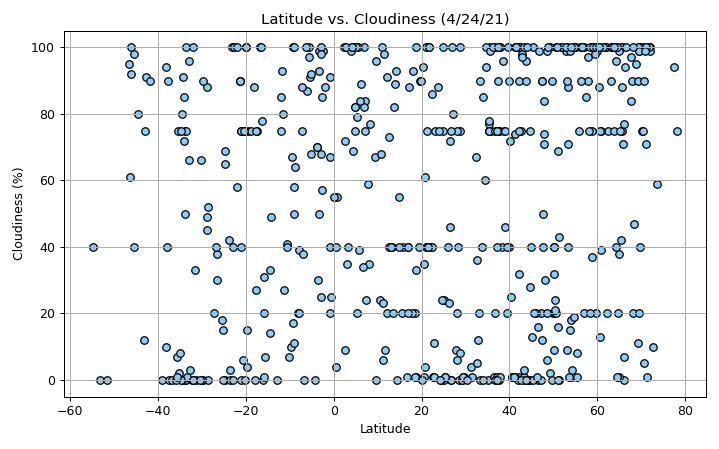

In [18]:
# Plot latitude vs humidity
figure3 = plt.figure(figsize=(8,5))
plot_title = 'Latitude vs. Cloudiness (4/24/21)'
x_label_name = 'Latitude'
y_label_name = 'Cloudiness (%)'
face = 'lightskyblue'
edge= 'black'

fig3 = show_plot(1, 5)
plt.tight_layout()

In [19]:
# Save the plot to png file in same place as cities.csv
# Like output_file = os.path.join("..", "output_data", "cities.csv")
latitude_vs_cloudiness_image_path = os.path.join('..', 'output_data', 'LatitudeVsCloudiness.png')
plt.savefig(latitude_vs_cloudiness_image_path)

plt.show()

### From instructions, after each plot add brief explanation of what the code is analyzing
* The figure above is plotting the latitude and cloudiness, and the linear regression is expected to show that there is no correlation between these factors. Whether looking in the southern hemisphere or the northern, cloudiness varies greatly.

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


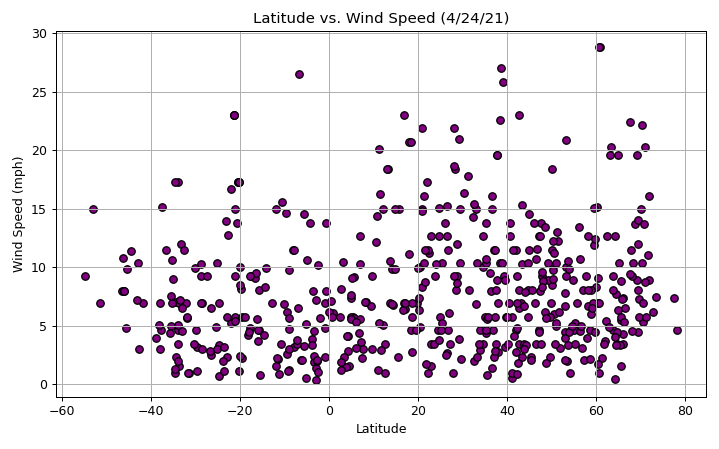

In [20]:
# Plot latitude vs humidity
figure4 = plt.figure(figsize=(8,5))
plot_title = 'Latitude vs. Wind Speed (4/24/21)'
x_label_name = 'Latitude'
y_label_name = 'Wind Speed (mph)'
face = 'purple'
edge= 'black'

fig4 = show_plot(1, 6)
plt.tight_layout()

In [21]:
# Save the plot to png file in same place as cities.csv
# Like output_file = os.path.join("..", "output_data", "cities.csv")
latitude_vs_windspeed_image_path = os.path.join('..', 'output_data', 'LatitudeVsWindSpeed.png')
plt.savefig(latitude_vs_windspeed_image_path)

plt.show()

### From instructions, after each plot add brief explanation of what the code is analyzing
* The figure above is plotting the latitude and wind speed. These also are factors that do not seem to be correlated, whether in the southern or the northern hemisphere.

## Linear Regression

### Divide the df into the northern and southern hemispheres

In [22]:
# Linear regressions will be done for the northern hemisphere (use latitude for northern >= 0)
# Create a df to work with both hemispheres separately
northern_weather_df = weather_df.loc[weather_df['Lat'] >= 0]
northern_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,umm lajj,25.0213,37.2685,78.22,73,0,5.77,SA,1619305551
1,vardo,70.3705,31.1107,34.88,76,100,22.15,NO,1619305389
2,suzun,53.7841,82.3116,32.52,82,15,3.38,RU,1619305551
4,sioux lookout,50.1001,-91.9170,39.20,28,40,11.50,CA,1619305552
5,san patricio,28.0170,-97.5169,91.99,19,20,21.85,US,1619305552
...,...,...,...,...,...,...,...,...,...
536,galle,6.0367,80.2170,79.11,83,84,3.13,LK,1619305713
537,avera,33.1940,-82.5271,64.40,88,90,10.36,US,1619305713
539,berlevag,70.8578,29.0864,33.89,69,99,13.71,NO,1619305713
540,high rock,26.6208,-78.2833,80.60,74,75,12.66,BS,1619305714


In [23]:
# Create df for linear regressions for the southern hemisphere (latitudes < 0)
southern_weather_df = weather_df.loc[weather_df['Lat'] < 0]
southern_weather_df                                     

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,mar del plata,-38.0023,-57.5575,59.00,72,40,6.91,AR,1619305538
7,esperance,-33.8667,121.9000,55.40,88,50,17.27,AU,1619305553
8,avarua,-21.2078,-159.7750,82.40,69,75,14.97,CK,1619305553
9,bambous virieux,-20.3428,57.7575,78.01,88,75,17.27,MU,1619305554
11,rikitea,-23.1203,-134.9692,78.55,74,100,13.94,PF,1619305554
...,...,...,...,...,...,...,...,...,...
528,broken hill,-31.9500,141.4333,50.00,71,0,5.75,AU,1619305711
529,kaeo,-35.1000,173.7833,66.99,68,8,8.99,NZ,1619305711
534,tingo maria,-9.2895,-76.0088,72.55,94,17,1.14,PE,1619305712
538,general pico,-35.6566,-63.7568,55.78,66,1,7.54,AR,1619305699


In [24]:
# Check cities count same as cell 8 for weather_df 
s_count = southern_weather_df.count()['City'] 
n_count = northern_weather_df.count()['City']
total_count = s_count + n_count
total_count

543

In [25]:
length_weather_df = weather_df['City'].value_counts()
print(length_weather_df)

lorengau          1
hambantota        1
muros             1
ulladulla         1
clyde river       1
                 ..
gwadar            1
conakry           1
saint-philippe    1
saint-georges     1
xiaoyi            1
Name: City, Length: 543, dtype: int64


### Define the functions for the plots and linear regressions needed

In [44]:
# Define additional functions that will allow simpler plotting, by northern and southern hemisphere
# For northern
def northern_calc_and_show_plot(x_col, y_col):
    x_values = northern_weather_df.iloc[:,x_col]
    y_values = northern_weather_df.iloc[:,y_col]
    
    correlation = sts.pearsonr(x_values, y_values)
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge)
    
    plt.title(plot_title)
    plt.xlabel(x_label_name)
    plt.ylabel(y_label_name)
    plt.grid()
    
    # For linear regression line
    lat_vs_slope, lat_vs_int, lat_vs_r, lat_vs_p, lat_vs_std_err = stats.linregress(x_values, y_values)
    line_fit = lat_vs_slope * x_values + lat_vs_int 
 
    plt.plot(x_values, line_fit,"r", label='y={:,.2f}x+{:.2f}'.format(lat_vs_slope,lat_vs_int))
    plt.legend(fontsize=10)
    
    # Print analysis details
    round_correlation = round(correlation[0], 2)
    
    print(f'pearsonr results: {correlation}.')
    print(f'The correlation between these two factors is {round_correlation}.')
    
    plt.show()    

In [51]:
# Define two more functions that will allow simpler plotting, by northern and southern hemisphere
# For southern
def southern_calc_and_show_plot(x_col, y_col):
    x_values = southern_weather_df.iloc[:,x_col]
    y_values = southern_weather_df.iloc[:,y_col]
    
    correlation = sts.pearsonr(x_values, y_values)
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge)
    
    plt.title(plot_title)
    plt.xlabel(x_label_name)
    plt.ylabel(y_label_name)
    plt.grid()
    
    # For linear regression line
    lat_vs_slope, lat_vs_int, lat_vs_r, lat_vs_p, lat_vs_std_err = stats.linregress(x_values, y_values)
    line_fit = lat_vs_slope * x_values + lat_vs_int 
 
    plt.plot(x_values, line_fit,"r", label='y={:,.2f}x+{:.2f}'.format(lat_vs_slope,lat_vs_int))
    plt.legend(fontsize=10)
    
    # Print analysis details
    round_correlation = round(correlation[0], 2)
    
    print(f'pearsonr results: {correlation}.')
    print(f'The correlation between these two factors is {round_correlation}.')
        
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


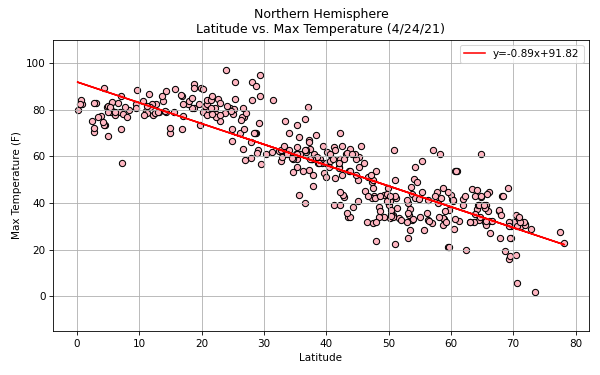

pearsonr results: (-0.8804788084576003, 1.3056814122913507e-123).
The correlation between these two factors is -0.88.


In [52]:
# Plot latitude vs max_temp, northern hemisphere
figure5 = plt.figure(figsize=(8,5))
plot_title = 'Northern Hemisphere\n\
Latitude vs. Max Temperature (4/24/21)'
x_label_name = 'Latitude'
y_label_name = 'Max Temperature (F)'
face = 'lightpink'
edge= 'black'

# Set ylim for entire temp range shown on weather_df.describe() for consistency betw s and n plots
plt.ylim(-15, 110)

# Plot with columns 1 and 3
fig5 = northern_calc_and_show_plot(1, 3)
plt.tight_layout()


plt.show()

In [53]:
# Save the plot to png file in same place as cities.csv
n_max_temp_lin_reg_image = os.path.join('..', 'output_data', 'N-LatitudeVsMaxTempWithLinReg.png')
plt.savefig(n_max_temp_lin_reg_image)


plt.show()

### Add observations for each plot with a linear regression
The above figure plots the latitudes in the northern hemisphere against the max temperatures. Near 0 for the x_axis the temperatures tend to be higher and then moving along the x-axis (moving away from the equator at latitude 0°) temperatures begin to fall. This makes sense since it is known that temparatures are higher near the equator. Latitude and temperature have very strong correlation (pearson correlation coefficient of nearly 0.90). In the northern hemisphere this is a negative correlation so the linear regression line plotted has a downward slope. Also the strong correlation is not by chance since the p-value is incredibly small.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


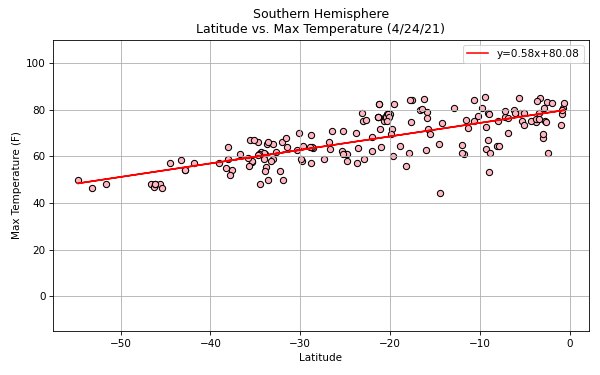

pearsonr results: (0.7331518132182244, 2.9154786663822197e-29).
The correlation between these two factors is 0.73.


In [54]:
# Plot latitude vs max_temp, southern hemisphere
figure6 = plt.figure(figsize=(8,5))
plot_title = 'Southern Hemisphere\n\
Latitude vs. Max Temperature (4/24/21)'
x_label_name = 'Latitude'
y_label_name = 'Max Temperature (F)'
face = 'lightpink'
edge= 'black'

# Set ylim for entire temp range shown on weather_df.describe() for consistency betw s and n plots
plt.ylim(-15, 110)
    
fig6 = southern_calc_and_show_plot(1, 3)
plt.tight_layout()

plt.show()

### Add observations for each plot with a linear regression
The above figure plots the latitudes in the southern hemisphere against the max temperatures. Along the far left of the figure the temperatures are lower because those are for latitudes farthest from the equator (latitude 0°). Moving along the x-axis temperatures begin to rise, approaching the equator. Latitude and temperature have a strong correlation (pearson correlation coefficient of around 0.70). In the southern hemisphere this is a positive correlation (slope of linear regression line is upward trending). Also the strong correlation is not by chance since the p-value is still incredibly small for this analysis.

In [55]:
# Save the plot to png file in same place as cities.csv
s_max_temp_lin_reg_image = os.path.join('..', 'output_data', 'S-LatitudeVsMaxTempWithLinReg.png')
plt.savefig(s_max_temp_lin_reg_image)


plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


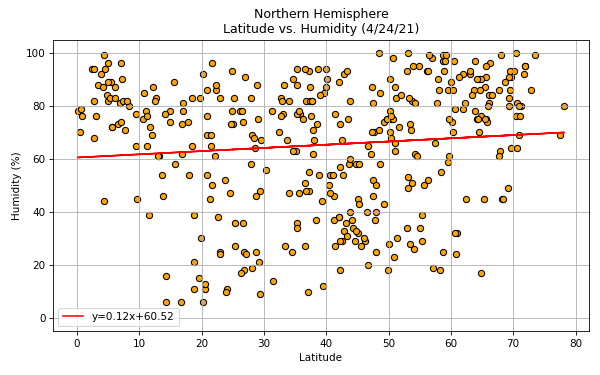

pearsonr results: (0.09842714218241713, 0.0562102735979931).
The correlation between these two factors is 0.1.


In [63]:
# Plot latitude vs humidity, northern hemisphere
figure7 = plt.figure(figsize=(8,5))
plot_title = 'Northern Hemisphere\n\
Latitude vs. Humidity (4/24/21)'

x_label_name = 'Latitude'
y_label_name = 'Humidity (%)'
face = 'orange'
edge= 'black'

# Set ylim for entire range of humidity 0 to 100% and a little wiggle room so that 
# northern and southern plots have same y limits
plt.ylim(-5, 105)

fig7 = northern_calc_and_show_plot(1, 4)
plt.tight_layout()

plt.show()

In [64]:
# Save the plot to png file in same place as cities.csv
n_humidity_lin_reg_image = os.path.join('..', 'output_data', 'N-LatitudeVsHumWithLinReg.png')
plt.savefig(n_humidity_lin_reg_image)

plt.show()

### Add observations for each plot with a linear regression
The above figure plots the latitudes in the northern hemisphere against the humidity. Along the far left of the figure the humidity seems a little lower. Moving away from the equator along the x-axis humidity seems to rise some, but the correlation is very weak. The p-value on 4/24/21 was about 0.056 so near what is usually labeled "significant". This means that the correlation being weak was not likely to have been accidental and there really is not much correlation at all between these factors. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


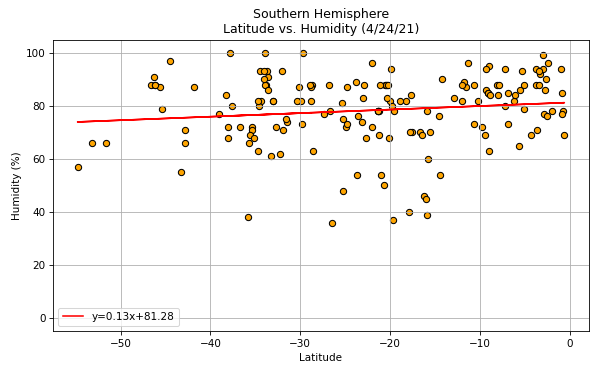

pearsonr results: (0.13262314307838238, 0.08850249149652568).
The correlation between these two factors is 0.13.


In [65]:
# Plot latitude vs humidity, southern hemisphere
figure8 = plt.figure(figsize=(8,5))
plot_title = 'Southern Hemisphere\n\
Latitude vs. Humidity (4/24/21)'

x_label_name = 'Latitude'
y_label_name = 'Humidity (%)'
face = 'orange'
edge= 'black'

# Set ylim for consistency between northern and southern plots
plt.ylim(-5, 105)

fig8 = southern_calc_and_show_plot(1, 4)
plt.tight_layout()

In [66]:
# Save the plot to png file in same place as cities.csv
s_humidity_lin_reg_image= os.path.join('..', 'output_data', 'S-LatitudeVsHumWithLinReg.png')
plt.savefig(s_humidity_lin_reg_image)

plt.show()

### Add observations for each plot with a linear regression
The above figure plots the latitudes in the southern hemisphere against the humidity. Along the far left of the figure the humidity seems a little lower and then there is a slight rise moving towards the equater at 0°. The correlation in the southern hemisphere is also very weak and the p-value is only marginally significant. This means that the correlation being weak was likely not to have been accidental and there is not much correlation between these factors. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


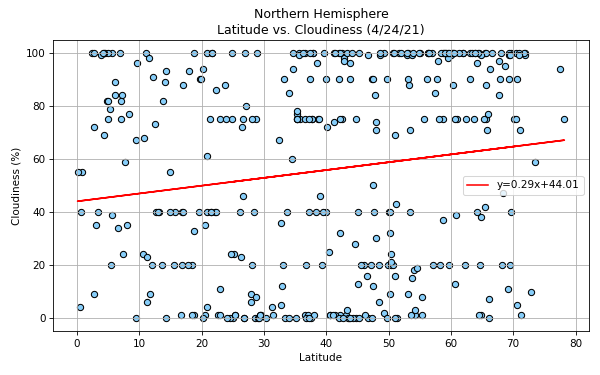

pearsonr results: (0.15229879103003469, 0.003030762995198457).
The correlation between these two factors is 0.15.


In [67]:
# Plot latitude vs cloudiness, northern hemisphere
figure9 = plt.figure(figsize=(8,5))
plot_title = 'Northern Hemisphere\n\
Latitude vs. Cloudiness (4/24/21)'

x_label_name = 'Latitude'
y_label_name = 'Cloudiness (%)'
face = 'lightskyblue'
edge= 'black'

fig7 = northern_calc_and_show_plot(1, 5)
plt.tight_layout()

In [69]:
# Save the plot to png file in same place as cities.csv
n_cloudiness_lin_reg_image = os.path.join('..', 'output_data', 'N-LatVsCloudsWithLinReg.png')
plt.savefig(n_cloudiness_lin_reg_image)

plt.show()

### Add observations for each plot with a linear regression
The above figure plots the latitudes in the northern hemisphere against cloudiness. Along the far left of the figure the cloudiness seems a little lower and then there is a slight rise moving away from equator. The correlation is very weak though, and the p-value is very small meaning it's not by chance that these factors do not show strong correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


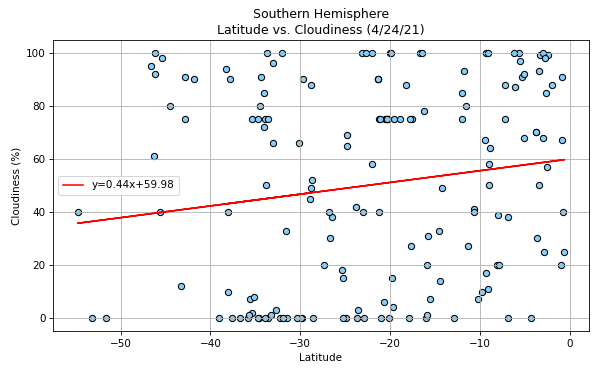

pearsonr results: (0.15897725296515092, 0.040773023565076935).
The correlation between these two factors is 0.16.


In [70]:
# Plot latitude vs cloudiness, southern hemisphere
figure10 = plt.figure(figsize=(8,5))
plot_title = 'Southern Hemisphere\n\
Latitude vs. Cloudiness (4/24/21)'

x_label_name = 'Latitude'
y_label_name = 'Cloudiness (%)'
face = 'lightskyblue'
edge= 'black'

fig10 = southern_calc_and_show_plot(1, 5)
plt.tight_layout()

plt.show()

In [72]:
# Save the plot to png file in same place as cities.csv
s_cloudiness_lin_reg_image = os.path.join('..', 'output_data', 'S-LatVsCloudsWithLinReg.png')
plt.savefig(s_cloudiness_lin_reg_image)

plt.show()

### Add observations for each plot with a linear regression
The above figure plots the latitudes in the southern hemisphere against cloudiness. Along the far left of the figure the cloudiness seems lower and then there is a slight rise moving towards the equator. The correlation is very weak though, and the p-value indicates significance, meaning these factors do not have much correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


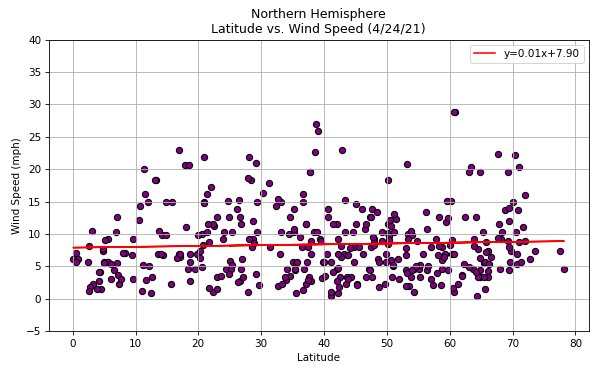

pearsonr results: (0.04720010007477272, 0.3607555584748868).
The correlation between these two factors is 0.05.


In [77]:
# Plot latitude vs wind speed, norhtern hemisphere
figure11 = plt.figure(figsize=(8,5))
plot_title = 'Northern Hemisphere\n\
Latitude vs. Wind Speed (4/24/21)'

x_label_name = 'Latitude'
y_label_name = 'Wind Speed (mph)'
face = 'purple'
edge= 'black'


# Set ylim for entire range of winds (0 to max of 40) for consistency between northern and southern plots
plt.ylim(-5, 40)
fig11 = northern_calc_and_show_plot(1, 6)
plt.tight_layout()

plt.show()

In [78]:
# Save the plot to png file in same place as cities.csv
n_wind_lin_reg_image = os.path.join('..', 'output_data', 'N-LatVsWindWithLinReg.png')
plt.savefig(n_wind_lin_reg_image)

plt.show()

### Add observations for each plot with a linear regression
The above figure plots the latitudes in the northern hemisphere against wind speed. The flatness of the line shows very little correlation between the factors. The p-value of 0.36 is not significant for this one so what would happen with another random group of cities is not known - results would be unpredictable without much correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


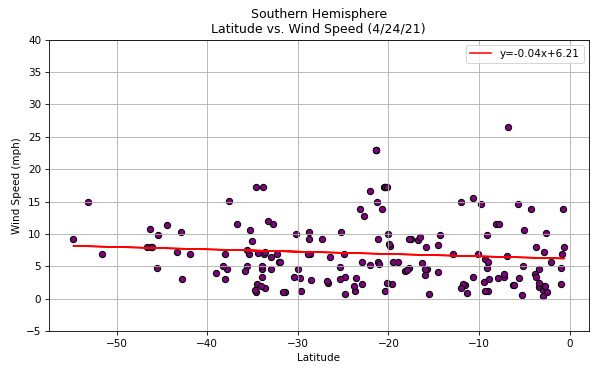

pearsonr results: (-0.09367886251236436, 0.2299493529116677).
The correlation between these two factors is -0.09.


In [79]:
# Plot latitude vs wind speed, southern hemisphere
figure12 = plt.figure(figsize=(8,5))
plot_title = 'Southern Hemisphere\n\
Latitude vs. Wind Speed (4/24/21)'

x_label_name = 'Latitude'
y_label_name = 'Wind Speed (mph)'
face = 'purple'
edge= 'black'

# Set ylim for entire range of winds (0 to max of 40) for consistency between northern and southern plots
plt.ylim(-5, 40)

fig12 = southern_calc_and_show_plot(1, 6)
plt.tight_layout()

plt.show()

In [80]:
# Save the plot to png file in same place as cities.csv
s_wind_lin_reg_image = os.path.join('..', 'output_data', 'S-LatVsWindWithLinReg.png')
plt.savefig(s_wind_lin_reg_image)

plt.show()

### Add observations for each plot with a linear regression
The above figure plots the latitudes in the southern hemisphere against wind speed and like in the northern hemisphere the flatness of the line shows very little correlation between the factors. The p-value of 0.36 is not significant for this one so what would happen with another random group of cities is not known - results would be unpredictable without much correlation.